In [65]:
%matplotlib notebook

In [66]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [67]:
import os 
import json
import sys
from collections import namedtuple
import pandas as pd
import re
Benchmark = namedtuple('Benchmark', 'isPolling iodepth numjobs GenIOPS ActualIOPS P99_lat cpu_idleness')
NumJobs = [1]
IODepth = [1, 2, 4,6, 8,10]
IOPS = (100000, 200000, 300000, 400000, 500000, 600000, 700000)

entries = os.listdir("./")
json_files = [f for f in entries if f.endswith("json")]
benchmark_record = []

for file in json_files:
#     print(file)
    with open(file) as fd:
        try:
            output = fd.read()
#             print(output)
            P99_lat = re.findall("\|*99.0th=\[(\d+)\]", output)
            assert len(P99_lat) == 1
            P99_lat = int(P99_lat[0])

            cpu_idle = re.findall("system: (\d+.\d+)%", output)
            assert len(cpu_idle) == 1
            cpu_idle = float(cpu_idle[0])



#             actual_iops = re.findall("iops.+avg=(\d+)", output)

            actual_iops = re.findall("IOPS=(.+)k,", output)
#             print(actual_iops)
            assert len(actual_iops) == 1
            actual_iops = float(actual_iops[0])*1000
        except:
            sys.stderr.write("error loading json %s" % file, file=sys.stdout)
            exit(1)
    sss = file.split("-")
    is_polling = 1 if sss[0]=="polling" else 0
    iodepth = int(sss[1])
    numjobs = int(sss[2])
    gen_iops = int(sss[3].split(".")[0])
    b1 = Benchmark(is_polling, \
        iodepth, \
        numjobs, \
        gen_iops, \
        actual_iops, \
        P99_lat,\
        cpu_idle)

        
    benchmark_record.append(b1)

df = pd.DataFrame(benchmark_record)
df["CPU_util"] =  100 - df["cpu_idleness"]
df["iops_per_cpuutil"] =  df["ActualIOPS"] / df["CPU_util"]
df["iops_per_CPU"] =  df["ActualIOPS"] / (6*df["CPU_util"]/100)
df["cycle_per_IOP"] = 3e9 / df["iops_per_CPU"]

In [68]:
df

,isPolling,iodepth,numjobs,GenIOPS,ActualIOPS,P99_lat,cpu_idleness,CPU_util,iops_per_cpuutil,iops_per_CPU,cycle_per_IOP
0,1,1,1,500000,71200.0,10944,71.63,28.37,2509.693338,41828.222301,71721.910112
1,1,2,1,300000,125000.0,14784,71.71,28.29,4418.522446,73642.040768,40737.600000
2,0,10,1,100000,105000.0,33024,86.76,13.24,7930.513595,132175.226586,22697.142857
3,0,2,1,300000,150000.0,15296,88.80,11.20,13392.857143,223214.285714,13440.000000
4,1,2,1,400000,125000.0,14784,71.74,28.26,4423.213022,73720.217032,40694.400000
...,...,...,...,...,...,...,...,...,...,...,...
79,0,4,1,500000,234000.0,22656,86.08,13.92,16810.344828,280172.413793,10707.692308
80,0,8,1,700000,228000.0,32384,88.38,11.62,19621.342513,327022.375215,9173.684211
81,1,10,1,500000,425000.0,36608,71.70,28.30,15017.667845,250294.464075,11985.882353
82,1,10,1,400000,425000.0,36096,71.66,28.34,14996.471418,249941.190308,12002.823529


<IPython.core.display.Javascript object>


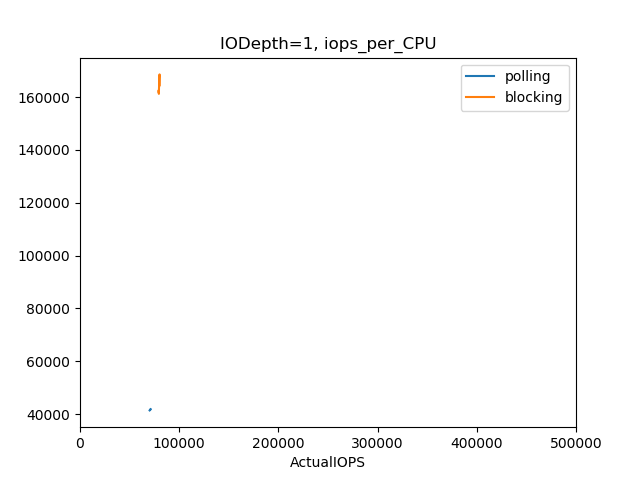

<IPython.core.display.Javascript object>


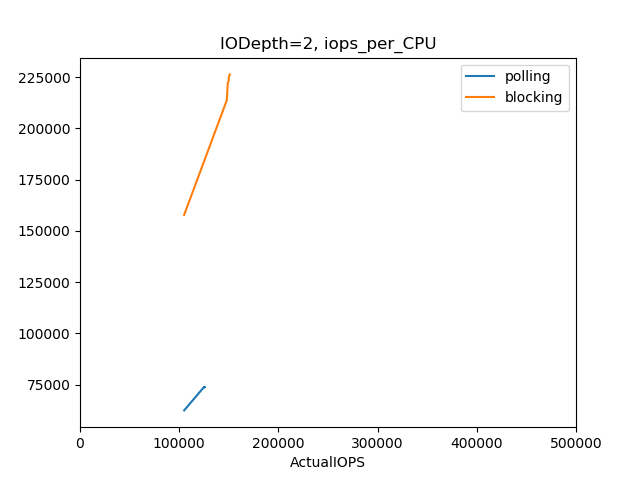

<IPython.core.display.Javascript object>


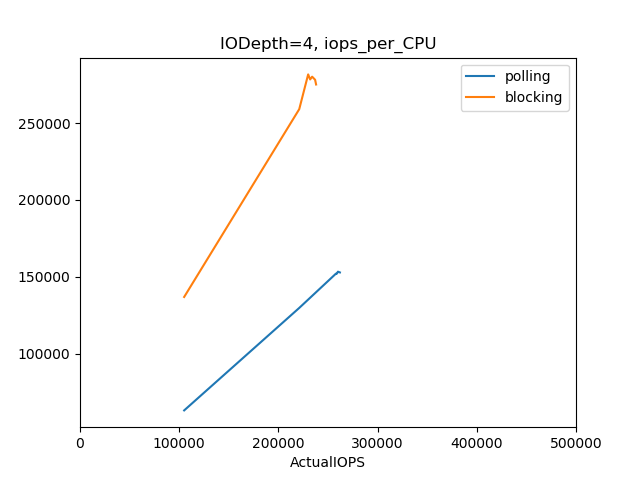

<IPython.core.display.Javascript object>


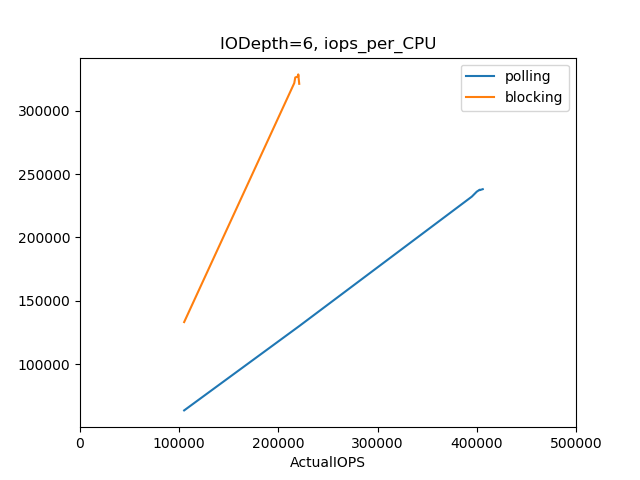

<IPython.core.display.Javascript object>


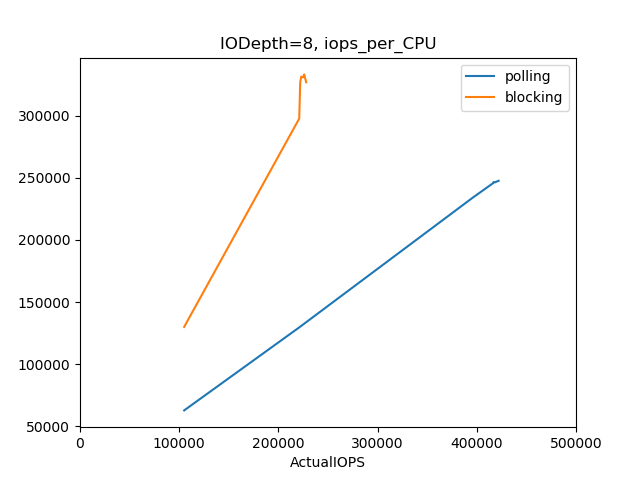

<IPython.core.display.Javascript object>


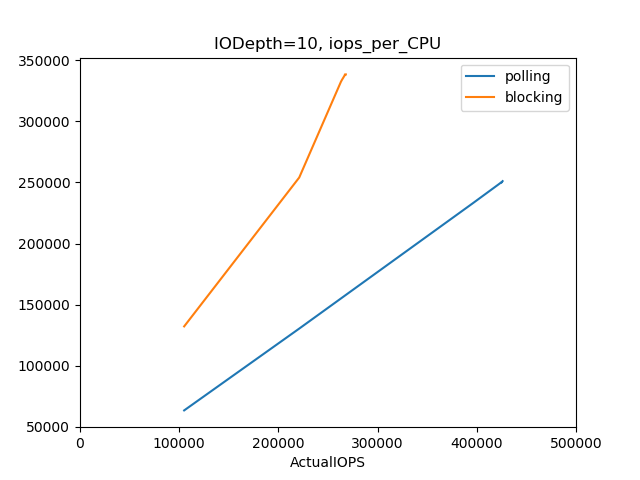

In [69]:
for iod in IODepth:
#     print(iod)
    blocking=df[(df["isPolling"]==0)&(df["iodepth"]==iod)]
    blocking=blocking.sort_values(by="ActualIOPS")

    polling=df[(df["isPolling"]==1)&(df["iodepth"]==iod)]
    polling=polling.sort_values(by="ActualIOPS")

    
#     ax1 = polling.plot.line(x="ActualIOPS",y="CPU_util",label="polling-iops_per_cpuutil")
#     blocking.plot.line(x="ActualIOPS",y="CPU_util",ax=ax1, label="blocking-iops_per_cpuutil")
#     ax1.set_title(label="IODepth=%d, CPU-utilization" % (iod))
#     ax1.set_xlim([0,400000])
#     ax1.set_ylim([0,30])

    ax2 = polling.plot.line(x="ActualIOPS",y="iops_per_CPU",label="polling")
    blocking.plot.line(x="ActualIOPS",y="iops_per_CPU",ax=ax2, label="blocking")
    ax2.set_title(label="IODepth=%d, iops_per_CPU" % (iod))
    ax2.set_xlim([0,500000])
#     ax2.set_ylim([0, 20000])

<IPython.core.display.Javascript object>


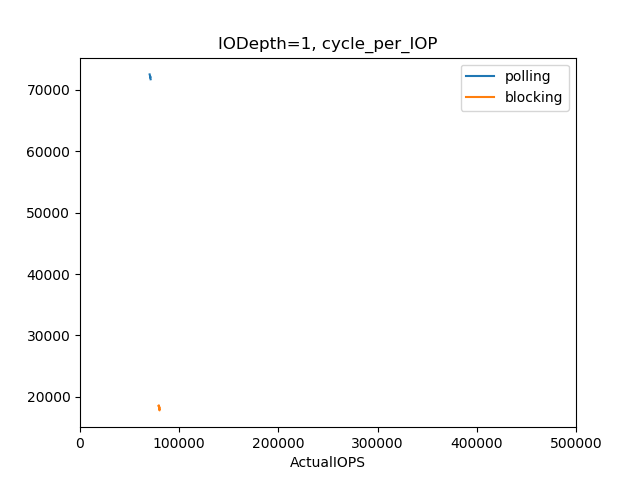

<IPython.core.display.Javascript object>


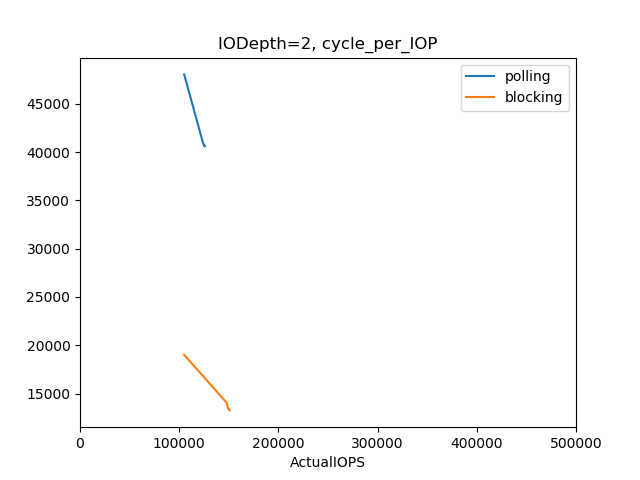

<IPython.core.display.Javascript object>


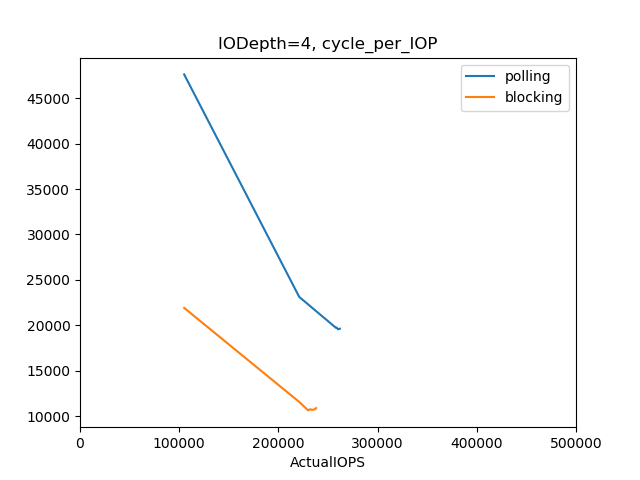

<IPython.core.display.Javascript object>


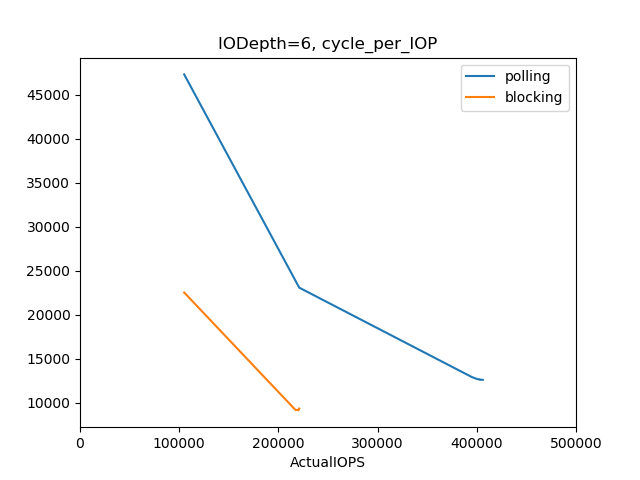

<IPython.core.display.Javascript object>


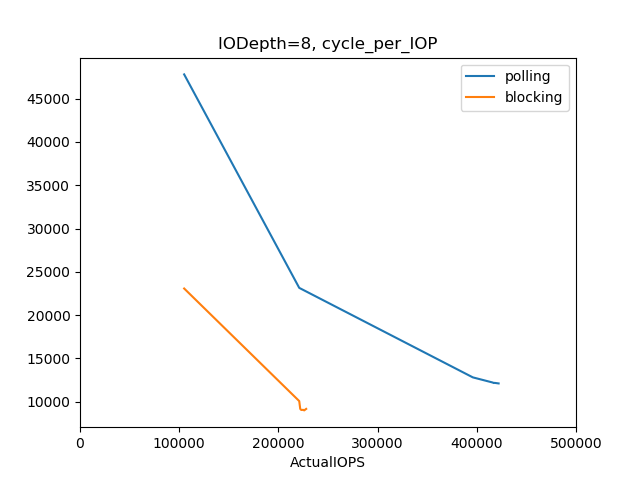

<IPython.core.display.Javascript object>


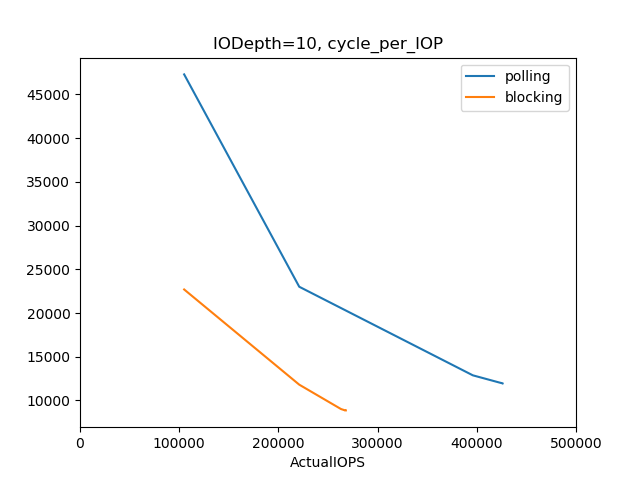

In [70]:
for iod in IODepth:
#     print(iod)
    blocking=df[(df["isPolling"]==0)&(df["iodepth"]==iod)]
    blocking=blocking.sort_values(by="ActualIOPS")

    polling=df[(df["isPolling"]==1)&(df["iodepth"]==iod)]
    polling=polling.sort_values(by="ActualIOPS")

    
#     ax1 = polling.plot.line(x="ActualIOPS",y="CPU_util",label="polling-iops_per_cpuutil")
#     blocking.plot.line(x="ActualIOPS",y="CPU_util",ax=ax1, label="blocking-iops_per_cpuutil")
#     ax1.set_title(label="IODepth=%d, CPU-utilization" % (iod))
#     ax1.set_xlim([0,400000])
#     ax1.set_ylim([0,30])

    ax2 = polling.plot.line(x="ActualIOPS",y="cycle_per_IOP",label="polling")
    blocking.plot.line(x="ActualIOPS",y="cycle_per_IOP",ax=ax2, label="blocking")
    ax2.set_title(label="IODepth=%d, cycle_per_IOP" % (iod))
    ax2.set_xlim([0,500000])
#     ax2.set_ylim([0, 20000])

<IPython.core.display.Javascript object>


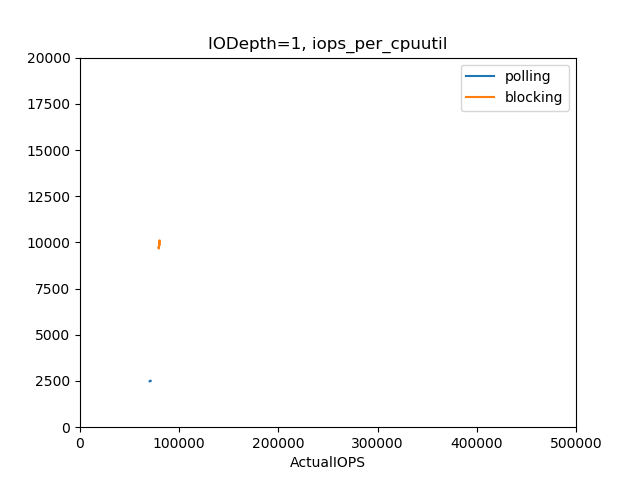

<IPython.core.display.Javascript object>


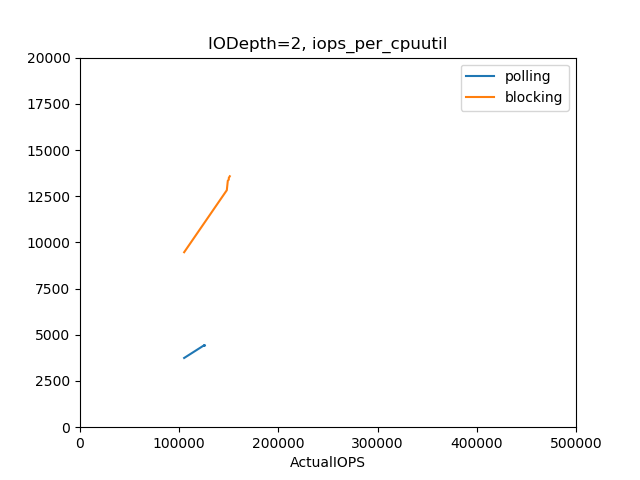

<IPython.core.display.Javascript object>


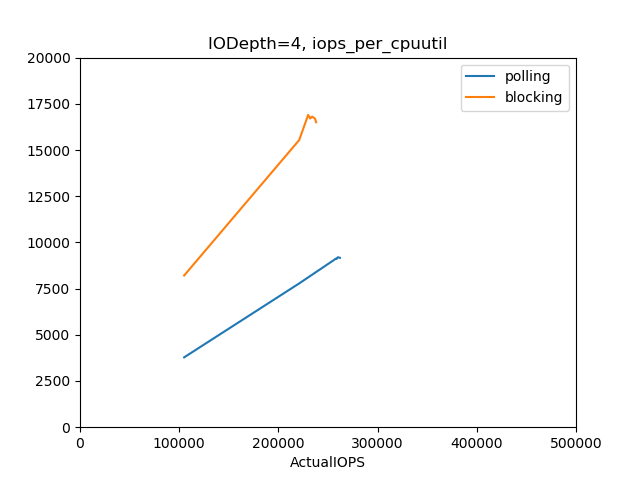

<IPython.core.display.Javascript object>


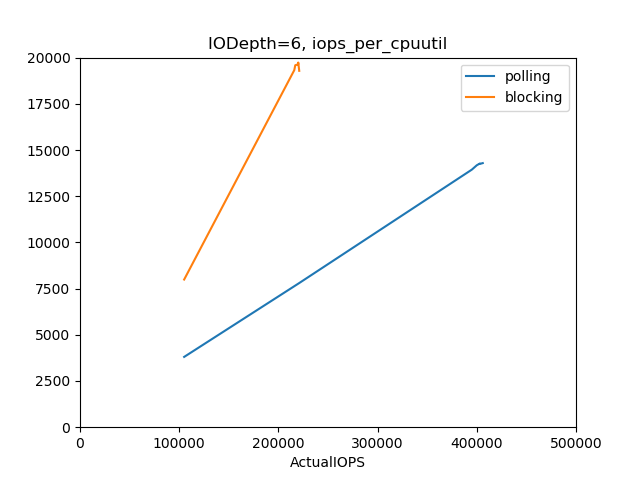

<IPython.core.display.Javascript object>


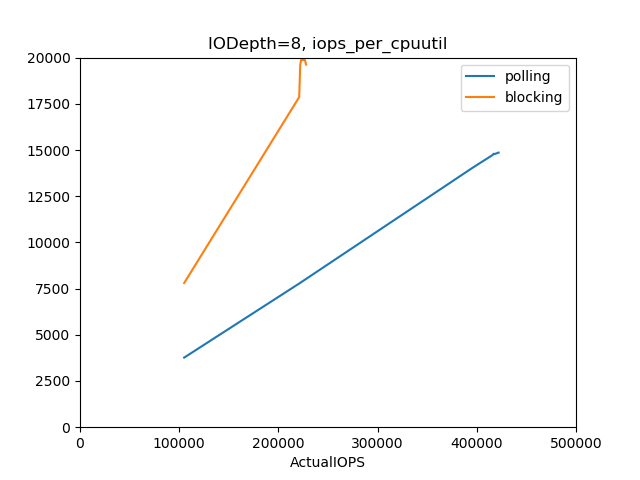

<IPython.core.display.Javascript object>


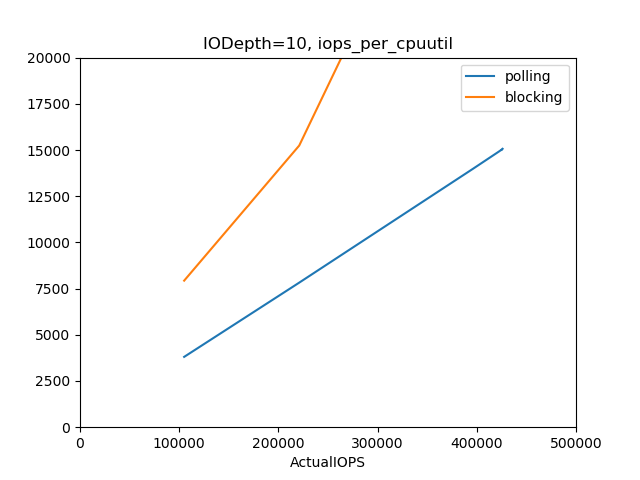

In [71]:
for iod in IODepth:
#     print(iod)
    blocking=df[(df["isPolling"]==0)&(df["iodepth"]==iod)]
    blocking=blocking.sort_values(by="ActualIOPS")

    polling=df[(df["isPolling"]==1)&(df["iodepth"]==iod)]
    polling=polling.sort_values(by="ActualIOPS")

    
#     ax1 = polling.plot.line(x="ActualIOPS",y="CPU_util",label="polling-iops_per_cpuutil")
#     blocking.plot.line(x="ActualIOPS",y="CPU_util",ax=ax1, label="blocking-iops_per_cpuutil")
#     ax1.set_title(label="IODepth=%d, CPU-utilization" % (iod))
#     ax1.set_xlim([0,400000])
#     ax1.set_ylim([0,30])

    ax2 = polling.plot.line(x="ActualIOPS",y="iops_per_cpuutil",label="polling")
    blocking.plot.line(x="ActualIOPS",y="iops_per_cpuutil",ax=ax2, label="blocking")
    ax2.set_title(label="IODepth=%d, iops_per_cpuutil" % (iod))
    ax2.set_xlim([0,500000])
    ax2.set_ylim([0, 20000])


<IPython.core.display.Javascript object>


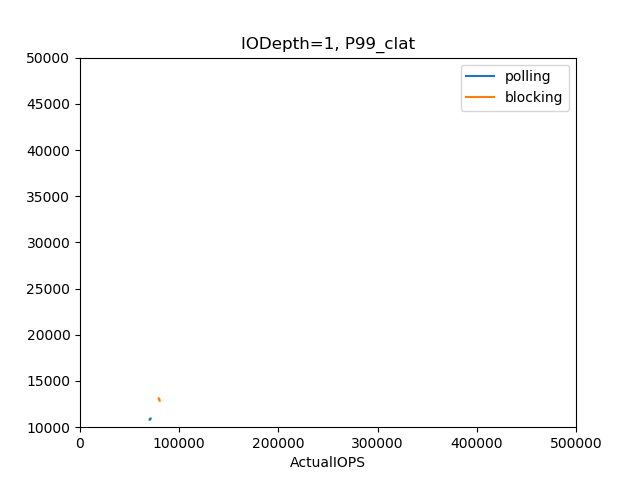

<IPython.core.display.Javascript object>


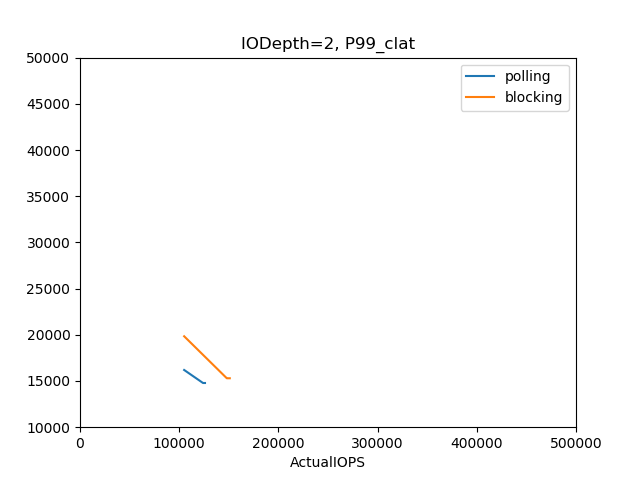

<IPython.core.display.Javascript object>


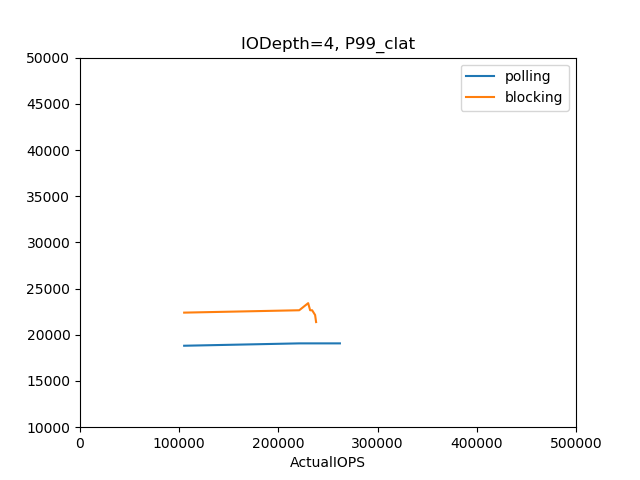

<IPython.core.display.Javascript object>


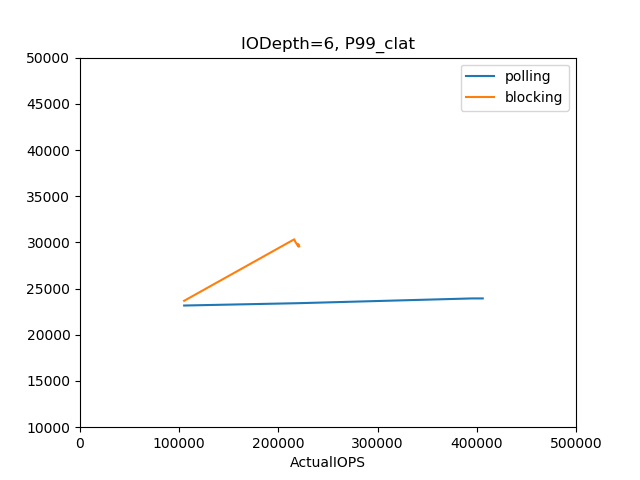

<IPython.core.display.Javascript object>


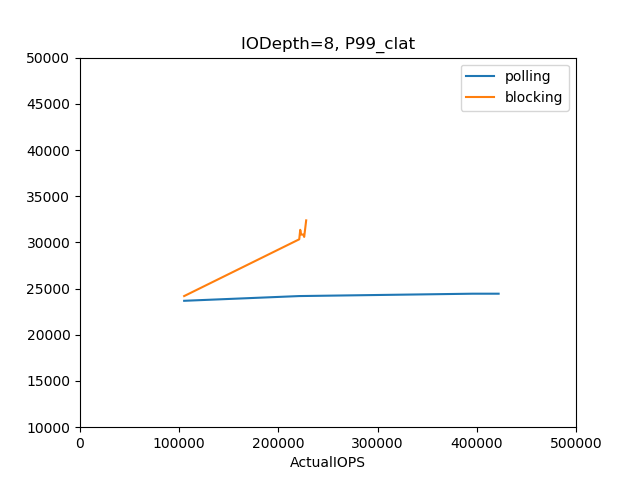

<IPython.core.display.Javascript object>


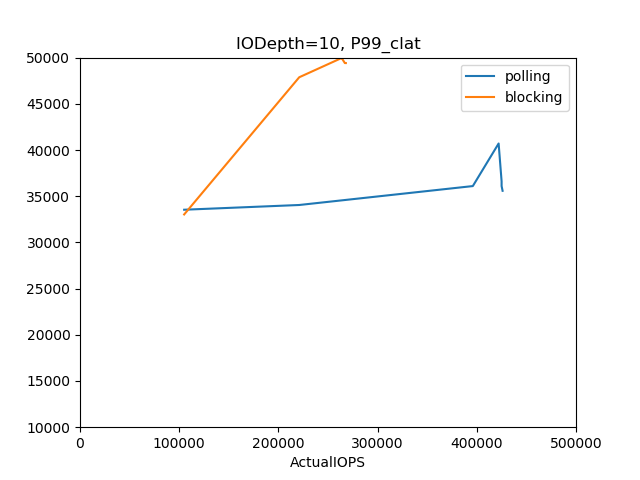

In [72]:
import matplotlib.pyplot as plt

for iod in IODepth:
#     print(iod)
    blocking=df[(df["isPolling"]==0)&(df["iodepth"]==iod)]
    blocking=blocking.sort_values(by="ActualIOPS")

    polling=df[(df["isPolling"]==1)&(df["iodepth"]==iod)]
    polling=polling.sort_values(by="ActualIOPS")
    
    ax = polling.plot.line(x="ActualIOPS",y="P99_lat",label="polling")
    blocking.plot.line(x="ActualIOPS",y="P99_lat",ax=ax, label="blocking")
    ax.set_title(label="IODepth=%d, P99_clat" % (iod))
    
    ax.set_xlim([0,500000])
    ax.set_ylim([10000, 50000])
    


<IPython.core.display.Javascript object>


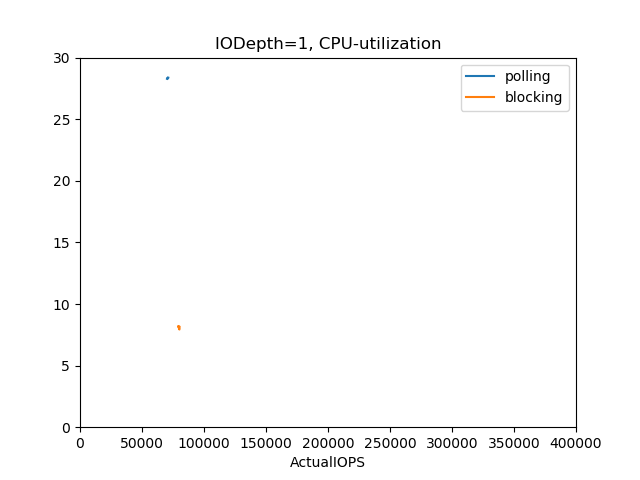

<IPython.core.display.Javascript object>


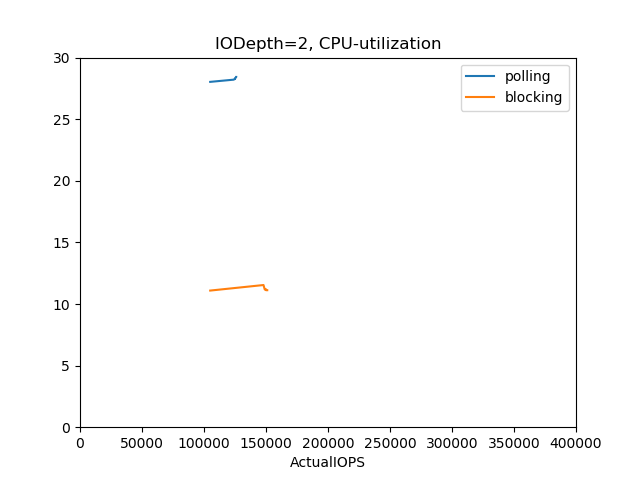

<IPython.core.display.Javascript object>


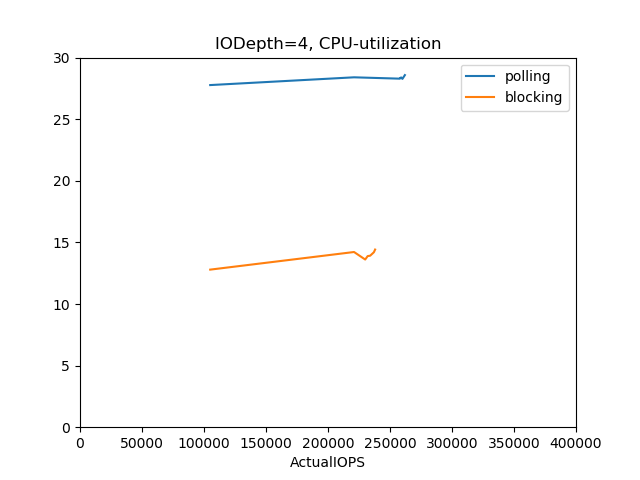

<IPython.core.display.Javascript object>


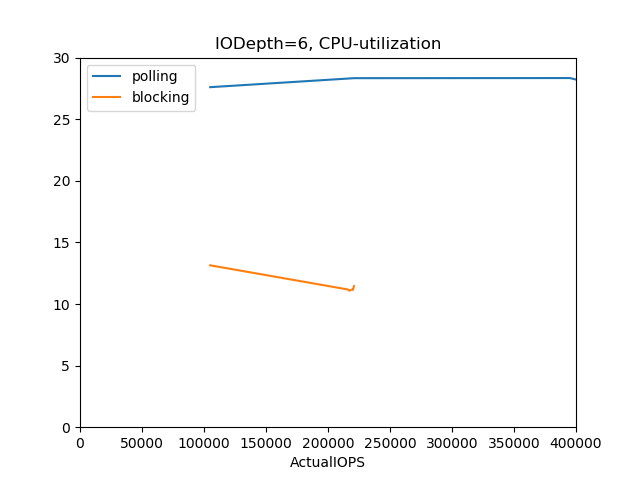

<IPython.core.display.Javascript object>


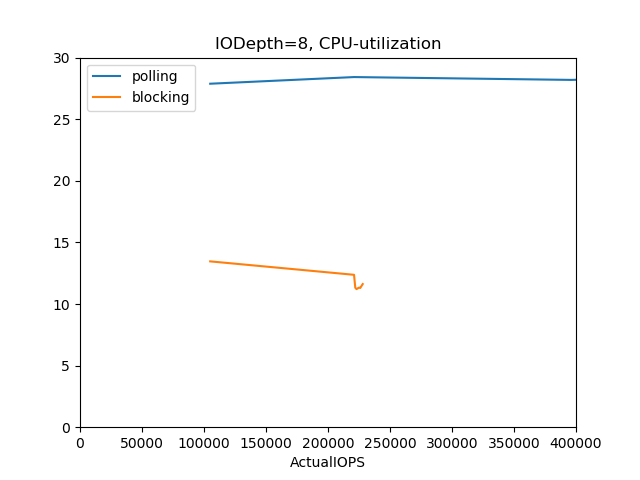

<IPython.core.display.Javascript object>


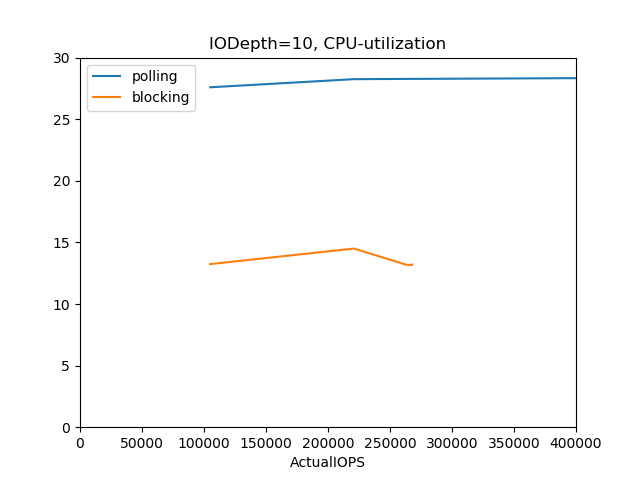

In [73]:
for iod in IODepth:
#     print(iod)
    blocking=df[(df["isPolling"]==0)&(df["iodepth"]==iod)]
    blocking=blocking.sort_values(by="ActualIOPS")

    polling=df[(df["isPolling"]==1)&(df["iodepth"]==iod)]
    polling=polling.sort_values(by="ActualIOPS")

    
    ax1 = polling.plot.line(x="ActualIOPS",y="CPU_util",label="polling")
    blocking.plot.line(x="ActualIOPS",y="CPU_util",ax=ax1, label="blocking")
    ax1.set_title(label="IODepth=%d, CPU-utilization" % (iod))
    ax1.set_xlim([0,400000])
    ax1.set_ylim([0,30])

#     ax2 = polling.plot.line(x="ActualIOPS",y="iops_per_cpuutil",label="polling-iops_per_cpuutil")
#     blocking.plot.line(x="ActualIOPS",y="iops_per_cpuutil",ax=ax2, label="blocking-iops_per_cpuutil")
#     ax2.set_title(label="IODepth=%d, iops_per_cpuutil" % (iod))
    ax2.set_xlim([0,500000])
#     ax2.set_ylim([0, 20000])

